# 1. Data Exploration & Cleaning

## Import dependencies, set up environment
1. `python3 -m venv .venv`
2. utilize virtual environment
    - (LINUX/MAC) `source .venv/bin/activate`
    - (WINDOWS) `.venv\Scripts\Activate.ps1`
3. `pip install -r requirements.txt`

In [89]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import astropy as ap
import scipy as sp
import io

### Cool Seaborn Pallete

In [90]:
sns.set_palette('rocket')
sns.set_style("darkgrid")
plt.style.use("dark_background")

### Importing Data

Upon reviewing the quality of data from the "Planetary Systems" (PS) database, it was deemed better to pivot towards the "Planetary Systems Composite Data" (PSCompPars) database. In brief:
1. PS details a record for each exoplanet and each one of its references (this helps us reach original literature analyses of these bodies). Missing data is prevelant.
2. PSCompPars curates a “best available” or “most complete” set of parameters for each planet, pulling from multiple references.

So far as our exploration of exoplanets and their stars (studying the whole population of exoplanets thus far), this seems outside the scope of our analysis, and creates a cumbersome process of exploring the data. This will aid in limiting time spent cleaning the dataset, and limit our analysis to 6065 from a daunting ~32,000 records.

For an explanation on how the composite dataset aggregates all available information on exoplanet figures, please see <https://exoplanetarchive.ipac.caltech.edu/docs/pscp_calc.html>.

In [91]:
# TAP base URL (Planetary Systems)
url = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync"
# The "Planetary Systems" database (confirmed exoplanets) is encoded as "ps" within the Exoplanet Archive
ADQL_query =    "SELECT " \
                "pl_controv_flag, pl_name, hostname, pl_letter, sy_snum, discoverymethod, disc_year," \
                "pl_radj, pl_massj, st_spectype, st_rad, st_mass, st_met, st_lum, st_teff " \
                "FROM PSCompPars"

# Request data as CSV
params = {
    "query": ADQL_query,
    "format": "csv"
}
response = requests.get(url, params=params)

# Load into "Planetary Systems" DataFrame
pscp = pd.read_csv(io.StringIO(response.text))
print("Data loaded successfully. Number of records:", len(pscp))

Data loaded successfully. Number of records: 6065


Over 355 columns in this dataset!! All different features we can analyze in another related project pertaining to exoplanet exploration and methods for doing so . . .

After reviewing the column descriptions (as defined here: <https://exoplanetarchive.ipac.caltech.edu/docs/API_PS_columns.html>), the following features are relevant to our exploration:
1. pl_controv_flag (is the comfirmation of this planet questioned?)
2. pl_name
3. hostname (most common star name)
4. pl_letter
5. sy_snum
6. discoverymethod
7. disc_year
8. pl_radj
9. pl_massj
10. st_spectype
11. st_rad
12. st_mass
13. st_met
14. st_lum

---

## Begin Exploration of Data

### Basic Exploration

In [92]:
print('======================================')
print('INFO')
print('======================================')
print(pscp.info())

print('======================================')
print('HEAD')
print('======================================')
print(pscp.head())

print('======================================')
print('DESCRIPTION')
print('======================================')
print(pscp.describe())

print('======================================')
print('MISSING VALUES')
print('======================================')
for col in pscp.columns:
    per_missing = pscp[col].isnull().sum() / len(pscp) * 100
    print(f'{col}: {per_missing:.2f}% missing values')

print('======================================')
print('VALUE COUNTS')
print('======================================')
for col in pscp:
    print(pscp[col].value_counts())

INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6065 entries, 0 to 6064
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_controv_flag  6065 non-null   int64  
 1   pl_name          6065 non-null   object 
 2   hostname         6065 non-null   object 
 3   pl_letter        6065 non-null   object 
 4   sy_snum          6065 non-null   int64  
 5   discoverymethod  6065 non-null   object 
 6   disc_year        6065 non-null   int64  
 7   pl_radj          6015 non-null   float64
 8   pl_massj         2290 non-null   float64
 9   st_spectype      2250 non-null   object 
 10  st_rad           5767 non-null   float64
 11  st_mass          6058 non-null   float64
 12  st_met           5532 non-null   float64
 13  st_lum           5773 non-null   float64
 14  st_teff          5789 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 710.9+ KB
None
HEAD
   pl_controv_flag        pl_nam

Lots of null values in the following features:
- `pl_massj` -> ~62.24% NULL
- `st_spectype` -> ~62.90% NULL

This could potentially be a consequence of survey methods? Transit observations lean heavily on visual information while radial velocity surveys are dependent on mass analysis. Lets see if there is a line of logic here to explain this discrepancy. . .

/tmp/ipykernel_253391/3007095672.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="discoverymethod", y="pl_massj_is_null", data=tempdf, palette='rocket')


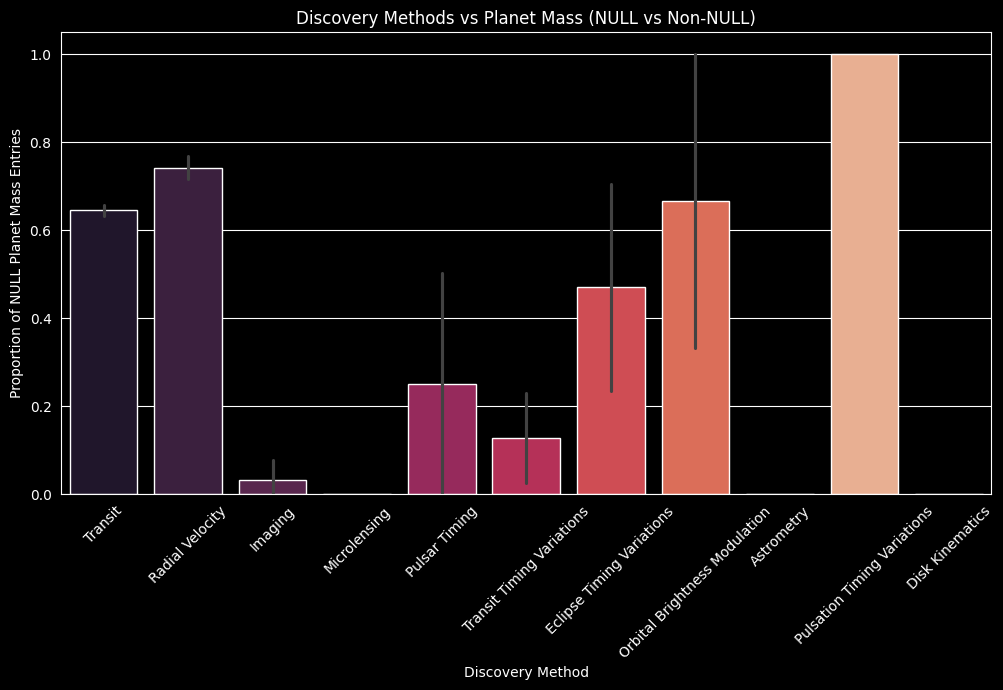

In [93]:
# bar graph of discovery methods vs pl_massj NULL and non-NULL counts
tempdf = pscp[['discoverymethod', 'pl_massj']].copy()
tempdf["pl_massj_is_null"] = tempdf["pl_massj"].isnull().astype(int)

plt.figure(figsize=(12, 6))
sns.barplot(x="discoverymethod", y="pl_massj_is_null", data=tempdf, palette='rocket')
plt.title('Discovery Methods vs Planet Mass (NULL vs Non-NULL)')
plt.xlabel('Discovery Method')
plt.ylabel('Proportion of NULL Planet Mass Entries')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_253391/1971055209.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="discoverymethod", y="st_spectype_is_null", data=tempdf, palette='rocket')


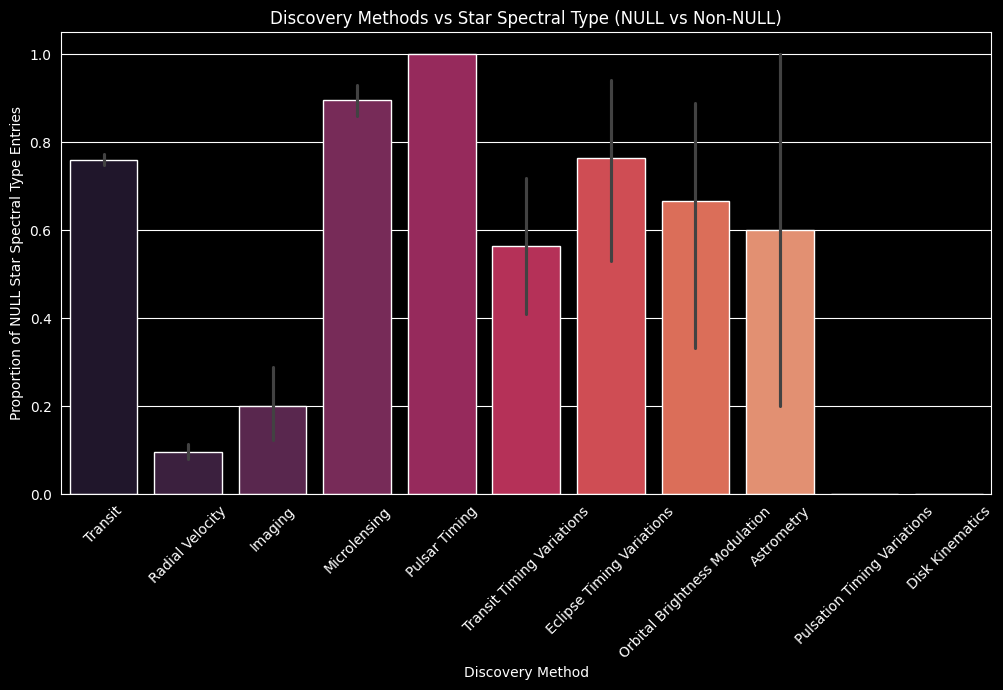

In [94]:
# bar graph of discovery methods vs st_spectype NULL and non-NULL counts
tempdf = pscp[['discoverymethod', 'st_spectype']].copy()
tempdf["st_spectype_is_null"] = tempdf["st_spectype"].isnull().astype(int)

plt.figure(figsize=(12, 6))
sns.barplot(x="discoverymethod", y="st_spectype_is_null", data=tempdf, palette='rocket')
plt.title('Discovery Methods vs Star Spectral Type (NULL vs Non-NULL)')
plt.xlabel('Discovery Method')
plt.ylabel('Proportion of NULL Star Spectral Type Entries')
plt.xticks(rotation=45)
plt.show()

Further analysis to determine how to handle the null values in the analysis . . .

In [95]:
print('======================================')
print('DISTRIBUTION OF DISCOVERY METHODS')
print('======================================')
count_disc_meth = dict(pscp['discoverymethod'].value_counts())
for method, count in count_disc_meth.items():
    print(f'{method}: {count} discoveries, {count/len(pscp)*100:.2f}%')

DISTRIBUTION OF DISCOVERY METHODS
Transit: 4474 discoveries, 73.77%
Radial Velocity: 1158 discoveries, 19.09%
Microlensing: 262 discoveries, 4.32%
Imaging: 90 discoveries, 1.48%
Transit Timing Variations: 39 discoveries, 0.64%
Eclipse Timing Variations: 17 discoveries, 0.28%
Orbital Brightness Modulation: 9 discoveries, 0.15%
Pulsar Timing: 8 discoveries, 0.13%
Astrometry: 5 discoveries, 0.08%
Pulsation Timing Variations: 2 discoveries, 0.03%
Disk Kinematics: 1 discoveries, 0.02%


### Exoplanets and Their Stars

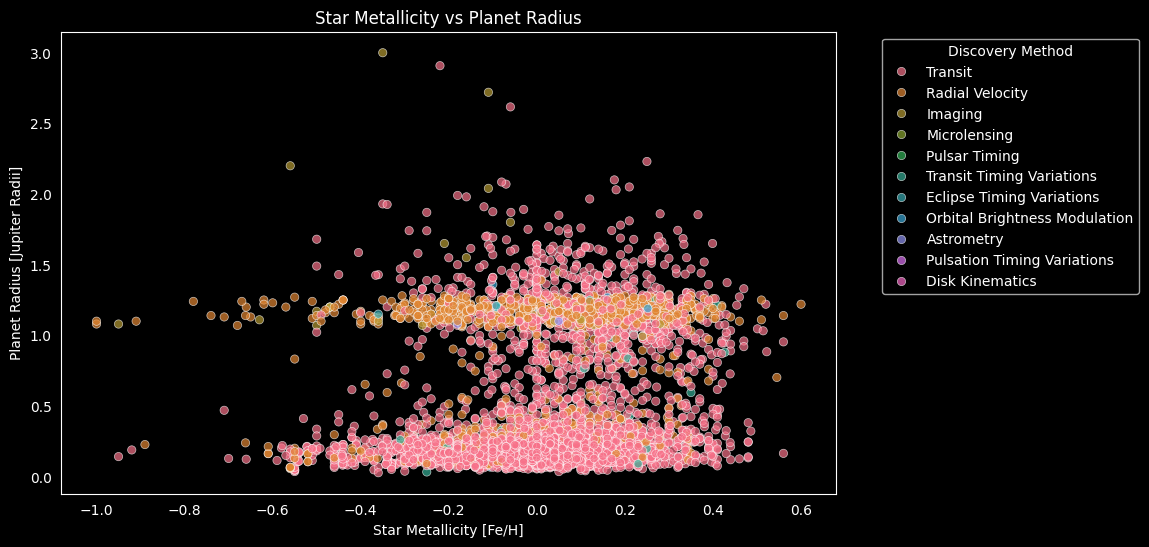

In [96]:
# example analysis of star metallicity vs planet radius
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pscp, x='st_met', y='pl_radj', hue='discoverymethod', alpha=0.7)
plt.title('Star Metallicity vs Planet Radius')
plt.xlabel('Star Metallicity [Fe/H]')
plt.ylabel('Planet Radius [Jupiter Radii]')
plt.legend(title='Discovery Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

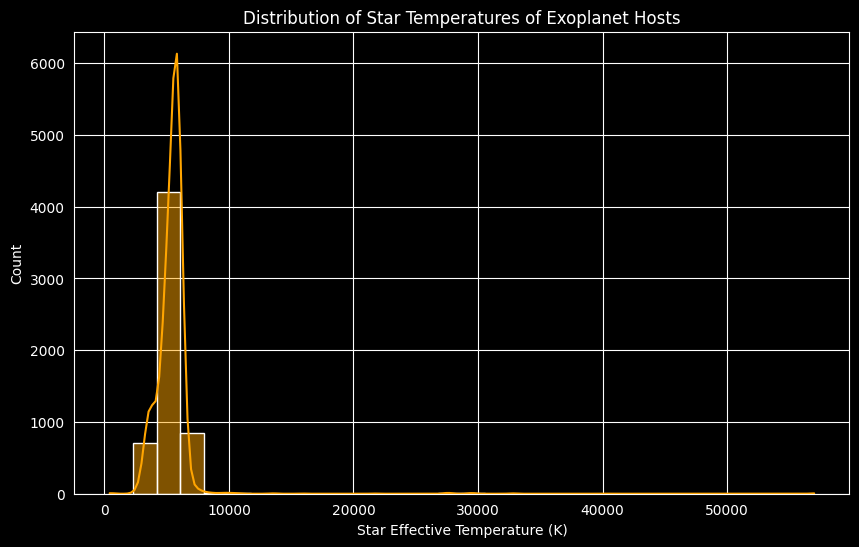

count     5789.000000
mean      5407.651226
std       1751.497979
min        415.000000
25%       4914.000000
50%       5551.000000
75%       5901.000000
max      57000.000000
Name: st_teff, dtype: float64


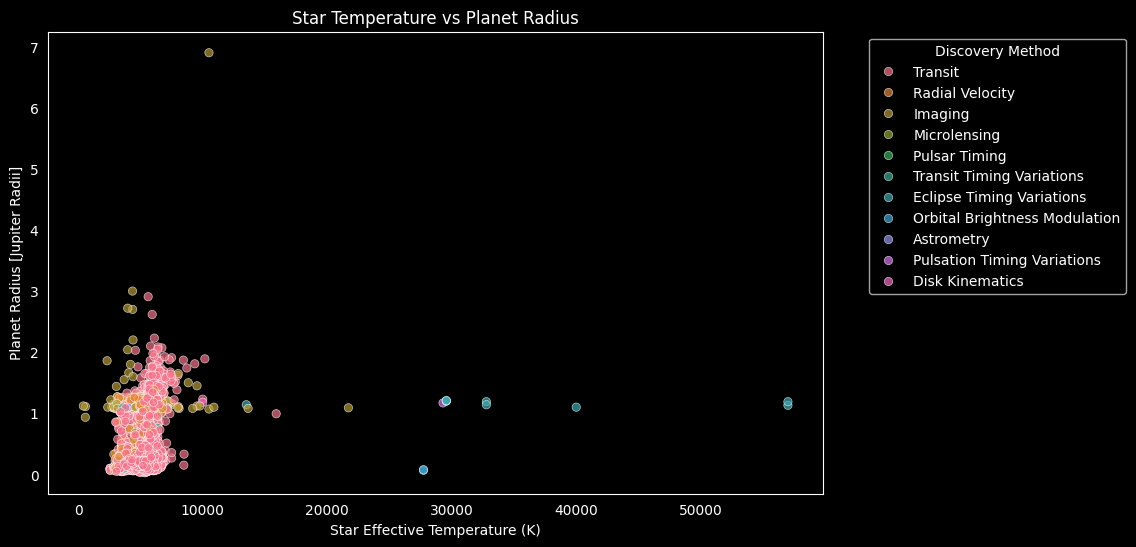

In [97]:
# Star temperature distribution over OBSERVED exoplanets
plt.figure(figsize=(10, 6))
sns.histplot(pscp['st_teff'].dropna(), bins=30, kde=True, color='orange')
plt.title('Distribution of Star Temperatures of Exoplanet Hosts')
plt.xlabel('Star Effective Temperature (K)')
plt.ylabel('Count')

plt.show()

print(pscp["st_teff"].describe())

# Exoplanets vs star temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pscp, x='st_teff', y='pl_radj', hue='discoverymethod', alpha=0.7)
plt.title('Star Temperature vs Planet Radius')
plt.xlabel('Star Effective Temperature (K)')
plt.ylabel('Planet Radius [Jupiter Radii]')
plt.legend(title='Discovery Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

In [98]:
# Scatterplot of star size vs 

In [99]:
# Exoplanets vs star metallicity

## Data Cleaning
### Define missing spectral types
As seen above, most stars are not defined by a sepctral type (in fact, this is the case for 62.90% of exoplanet host stars observed). Without this information, it would be impossible to define how certain observation types favor one type of star over another.

Star classifications, however, can be defined by primarily by temperature (something that is available to us in this analysis). The Morgan-Keenan classification system (the standard for clasiffying stars) is defined as follows:
- O: > 30,000 K
- B: 10,000–30,000 K
- A: 7,500–10,000 K
- F: 6,000–7,500 K
- G: 5,200–6,000 K (the Sun is G2V)
- K: 3,900–5,200 K
- M: < 3,900 K

with subclasses (as indicated by a number 0-9) identifying different steps within a major classification.

Additionally, the lumonocity class is defined as follows:
- I = supergiants
- II = bright giants
- III = giants
- IV = subgiants
- V = main sequence

In [101]:
# Create new feature for first character of st_spectype
pscp['st_spectype_class'] = pscp['st_spectype'].astype(str).str[0]

# Method for defining specteral type based on star temperature ranges
def fix_spectype(row):
    # spectype already . . .
    if not pd.isnull(row["st_spectype"]):
        return row["st_spectype"][0]
    # else, assign based on temperatures. . .
    elif pd.isnull(row["st_spectype"]) and row['st_teff'] > 30000:
        return "O"
    elif pd.isnull(row["st_spectype"]) and 10000 < row['st_teff'] <= 30000:
        return "B"
    elif pd.isnull(row["st_spectype"]) and 7500 < row['st_teff'] <= 10000:
        return "A"
    elif pd.isnull(row["st_spectype"]) and 6000 < row['st_teff'] <= 7500:
        return "F"
    elif pd.isnull(row["st_spectype"]) and 5200 < row['st_teff'] <= 6000:
        return "G"
    elif pd.isnull(row["st_spectype"]) and 3700 < row['st_teff'] <= 5200:
        return "K"
    elif pd.isnull(row["st_spectype"]) and row['st_teff'] <= 3700:
        return "M"
    # if no temp value and no spectype . . . 
    else:
        return "UNKNOWN"

pscp["st_spectype_class"] = pscp.apply(fix_spectype, axis=1)


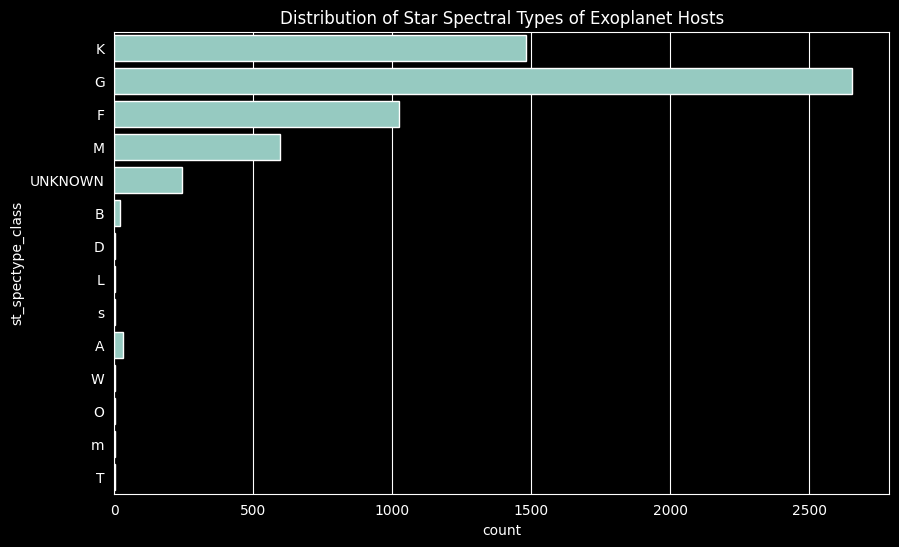

Total records: 6065
Null counts of host star temp and spectype: 244
Null counts of host star temp: 276
Null count of host star spectype: 3815
UNKOWN count in st_spectype_class INCORRECT


In [ ]:
# Output initial results after defining spectype for null values
plt.figure(figsize=(10,6))
sns.countplot(data=pscp['st_spectype_class'])
plt.title('Distribution of Star Spectral Types of Exoplanet Hosts')
plt.show()

# Verifying st_spectype_class logic
# 'UNKOWN' values should be limited to (null st_teff U null st_spectype)
total_records = len(pscp)
c_n_star_temp_and_type = pscp["st_spectype_class"].value_counts()["UNKNOWN"]
c_n_star_temp = pscp["st_teff"].isnull().sum()
c_n_star_type = pscp["st_spectype"].isnull().sum()

print(f'Total records: {total_records}')
print(f'Null counts of host star temp and spectype: {c_n_star_temp_and_type}')
print(f'Null counts of host star temp: {c_n_star_temp}')
print(f'Null count of host star spectype: {c_n_star_type}')

appropriate_unknown_count = 0

#this count isn't even right, hahaha
if c_n_star_temp_and_type == (pscp['st_teff'].isnull().sum() + pscp['st_spectype'].isnull().sum()):
    print('UNKOWN count in st_spectype_class verified')
else:
    print('UNKOWN count in st_spectype_class INCORRECT')

Verified that stars have been classified accordingly, not dropping the values (~% of dataset) that cannot be utilized for my analysis.